<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
وارد کردن کتابخانه‌ها
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این بخش، کتابخانه‌های مختلفی برای انجام پردازش‌های مختلف بر روی داده‌ها وارد می‌شوند. این کتابخانه‌ها شامل <b>random</b> برای تولید اعداد تصادفی، <b>re</b> برای کار با عبارات منظم، <b>nltk</b> برای پردازش زبان طبیعی، <b>pandas</b> برای تجزیه و تحلیل داده‌ها، <b>math</b> برای محاسبات ریاضی، و <b>matplotlib</b> برای رسم نمودارها هستند. همچنین برای توکنایز کردن داده‌ها، کتابخانه <b>nltk</b> بارگذاری می‌شود.
</font>
</p>

In [1]:
import random
import re
from collections import defaultdict
import nltk
import pandas as pd
import math
import matplotlib.pyplot as plt

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kiananasiri/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
خواندن داده‌ها
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این بخش داده‌ها از فایل متنی <b>twits.txt</b> بارگذاری می‌شوند. پس از خواندن داده‌ها، نوع داده و طول آن و همچنین اولین ۵۰۰ کاراکتر آن چاپ می‌شود تا بررسی اولیه‌ای از داده‌ها داشته باشیم.
</font>
</p>

In [2]:
# Read the data
with open("../Data/twits.txt", "r", encoding="utf-8") as f:
    data = f.read()

print("Data type:", type(data))
print("Number of characters:", len(data))
print("First 500 characters:", data[:500])

Data type: <class 'str'>
Number of characters: 3256325
First 500 characters: How are you? Btw thanks for the RT. You gonna be in DC anytime soon? Love to see you. Been way, way too long.
When you meet someone special... you'll know. Your heart will beat more rapidly and you'll smile for no reason.
they've decided its more fun if I don't.
So Tired D; Played Lazer Tag & Ran A LOT D; Ughh Going To Sleep Like In 5 Minutes ;)
Words from a complete stranger! Made my birthday even better :)
First Cubs game ever! Wrigley field is gorgeous. This is perfect. Go Cubs Go!
i no! i ge


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
توکنایز کردن متن
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این بخش، باید تابعی برای پیش‌پردازش داده‌ها بنویسید که شامل مراحل زیر باشد:
<ul>
    <li>تبدیل تمام متن به حروف کوچک</li>
    <li>حذف علائم نگارشی</li>
    <li>توکنایز کردن متن به جملات و سپس به کلمات</li>
</ul>
شما باید این توابع را به گونه‌ای بنویسید که بتوانید داده‌ها را آماده استفاده در مراحل بعدی کنید.
</font>
</p>

In [28]:
# TODO
from nltk.tokenize import sent_tokenize
import re
def preprocess_text(text):
    """
    Preprocess the input text: lowercase, remove special characters, and tokenize sentences.
    """
    sentences = sent_tokenize(text)
    for i , sen in enumerate(sentences):
        sentences[i] = re.sub( r'[^a-zA-Z0-9 ]+', '' , sen.lower() )
    return sentences

# Preprocess the data
sentences = preprocess_text(data)

# Display the first 5 sentences
print("\nPreprocessed Sentences:")
print(sentences[:10])


Preprocessed Sentences:
['how are you', 'btw thanks for the rt', 'you gonna be in dc anytime soon', 'love to see you', 'been way way too long', 'when you meet someone special youll know', 'your heart will beat more rapidly and youll smile for no reason', 'theyve decided its more fun if i dont', 'so tired d played lazer tag  ran a lot d ughh going to sleep like in 5 minutes words from a complete stranger', 'made my birthday even better first cubs game ever']


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
جایگزینی کلمات خارج از واژه‌نامه با <b>&lt;unk&gt;</b>
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این مرحله شما باید تابعی بنویسید که کلمات خارج از واژه‌نامه را با کلمه خاصی مانند <b>&lt;unk&gt;</b> جایگزین کند. این تابع باید به طور خودکار کلماتی که در واژه‌نامه وجود ندارند را شناسایی کرده و آن‌ها را با این کلمه خاص جایگزین نماید.
</font>
</p>

In [48]:
# TODO
from nltk.tokenize import word_tokenize

def replace_oov_words_by_unk(tokenized_sentences, vocabulary, unknown_token="<unk>"):
    """
    Replace words not in the given vocabulary with '<unk>' token.
    """
    for j,sen in enumerate(tokenized_sentences):
        words = word_tokenize(sen)
        for i, word in enumerate(words):
            if word not in vocabulary:
                words[i] = unknown_token
        tokenized_sentences[j] = ' '.join(words)
                
    return tokenized_sentences

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
استخراج کلمات با فرکانس n یا بیشتر
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این بخش باید تابعی بنویسید که کلمات با فرکانس n یا بیشتر را از داده‌ها استخراج کند. این کار کمک می‌کند تا فقط کلمات پرکاربرد در مدل استفاده شوند و کلمات نادر که ممکن است در پیش‌بینی‌های مدل اثر منفی داشته باشند، حذف شوند.
</font>
</p>

In [39]:
from nltk.tokenize import word_tokenize
def get_frequency_of_each_word(data):
    words  = []
    for sen in data:
        words.extend(word_tokenize(sen))
    
    return Counter(words)

In [40]:
# TODO
from collections import Counter
def get_words_with_nplus_frequency(data, n):
    """
    Get words appearing n or more times in the data.
    """
    freqs = get_frequency_of_each_word(data)
    
    return [k for k, v in freqs.items() if v >= n]

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش‌پردازش داده‌ها
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این مرحله داده‌ها برای استفاده در مدل آماده می‌شوند. این کار شامل تقسیم داده‌ها به داده‌های آموزشی و آزمایشی و سپس جایگزینی کلمات خارج از واژه‌نامه با <b>&lt;unk&gt;</b> است. همچنین برای واژه‌نامه، کلمات با فرکانس n یا بیشتر استخراج می‌شوند.
</font>
</p>

In [49]:
# TODO
def preprocess_data(train_data, count_threshold):
    """
    Preprocess data to handle out-of-vocabulary words by replacing them with <unk>.
    """
    vocabulary = get_words_with_nplus_frequency(train_data, count_threshold)
    train_data_replaced = replace_oov_words_by_unk(train_data, vocabulary)

    return train_data_replaced, vocabulary


# Apply preprocessing
train_sentences = sentences[:int(0.8 * len(sentences))]
test_sentences = sentences[int(0.8 * len(sentences)):]
train_sentences_replaced, vocabulary = preprocess_data(train_sentences, count_threshold=5)
test_sentences_replaced = replace_oov_words_by_unk(test_sentences, vocabulary)

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
ایجاد n-gramها
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این مرحله باید تابعی بنویسید که n-gramها را از مجموعه توکن‌ها تولید کند. یک n-gram مجموعه‌ای از n کلمه است که در کنار هم آمده‌اند. این کار به مدل کمک می‌کند تا الگوهای موجود در داده‌ها را یاد بگیرد.
</font>
</p>

In [51]:
def generate_ngrams(tokens, n):
    """
    Generate n-grams from a list of tokens.
    """
    ngrams = [tuple(tokens[i:i + n]) for i in range(len(tokens) - n + 1)]
    return ngrams


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
ساخت مدل n-gram
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این مرحله شما باید مدل n-gram را بسازید. مدل باید از جملات توکنایز شده استفاده کرده و تعداد وقوع n-gramها را محاسبه کند. این مدل برای تولید جملات جدید و محاسبه احتمال وقوع جملات استفاده می‌شود.
</font>
</p>

In [52]:
def build_ngram_model(sentences, n):
    """
    Build an n-gram model from the tokenized sentences.
    """
    ngram_model = defaultdict(int)
    
    for sentence in sentences:
        tokens = word_tokenize(sentence)
        ngrams = generate_ngrams(tokens, n)
        for ngram in ngrams:
            ngram_model[ngram] += 1
    
    return ngram_model

# Build the n-gram model
n = 3
ngram_model = build_ngram_model(train_sentences_replaced, n)

# Display a sample of the n-gram model
print("\nN-gram Model (Sample):")
for key, value in list(ngram_model.items())[:5]:
    print(f"{key}: {value}")


N-gram Model (Sample):
('how', 'are', 'you'): 50
('btw', 'thanks', 'for'): 2
('thanks', 'for', 'the'): 297
('for', 'the', 'rt'): 57
('you', 'gon', 'na'): 12


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
تولید جملات
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این بخش شما باید تابعی بنویسید که با استفاده از مدل n-gram جملات جدیدی تولید کند. این تابع باید به طور تصادفی کلمات را از مدل انتخاب کرده و جمله‌ای را بسازد. طول جمله‌ها نیز محدودیت دارد.
</font>
</p>

In [53]:
import random

def generate_sentence(ngram_model, n, max_length=15):
    """
    Generate a sentence using the n-gram model.
    """
    # Start with a random n-1 gram
    start = random.choice(list(ngram_model.keys()))
    sentence = list(start)

    # Generate words until max_length is reached
    for _ in range(max_length - (n - 1)):
        # Get the current n-1 gram
        current_ngram = tuple(sentence[-(n - 1):])
        
        # Find possible next words
        possible_next_words = {key[-1]: count for key, count in ngram_model.items() if key[:-1] == current_ngram}
        
        if not possible_next_words:
            break  # Stop if no next word is found
        
        # Choose the next word based on probabilities
        next_word = random.choices(list(possible_next_words.keys()), weights=possible_next_words.values())[0]
        sentence.append(next_word)
        
        # Stop if the sentence ends with a terminal token
        if next_word in ['.', '!', '?']:
            break

    return ' '.join(sentence)

# Generate a few example sentences
generated_sentences = [generate_sentence(ngram_model, n) for _ in range(10)]
print("\nGenerated Sentences:")
for sentence in generated_sentences:
    print(f"- {sentence}")


Generated Sentences:
- > money from his awkward < unk > a few days also my days < unk
- this a try for the < unk > theres no bird crap
- they are impossible
- achieve any real and my english
- > baby tribute to such a great birthday today austin
- his style of parenting
- the grandma of pop so go to < unk > by < unk > from art
- of way but w god your on too
- > services on sunday mornings look into late next week for you and im < unk
- is the perfect prank to pull < unk > a table outside


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
محاسبه پرپلکسیتی
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این مرحله، شما باید پرپلکسیتی یک جمله را محاسبه کنید. پرپلکسیتی معیاری است که نشان می‌دهد مدل چقدر خوب است. هر چه پرپلکسیتی کمتر باشد، مدل بهتر است. شما باید این تابع را با استفاده از مدل n-gram و با اعمال هم‌سطحی (smoothing) بنویسید.
</font>
</p>

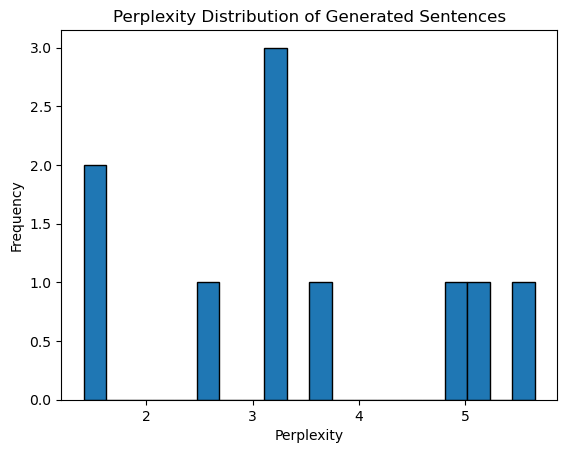

In [54]:
# TODO
def calculate_perplexity(sentence, ngram_model, n, smoothing_factor=1e-10):
    """
    Calculate the perplexity of a sentence using the n-gram model with smoothing.
    """
    tokens = word_tokenize(sentence)
    N = len(tokens)
    log_prob_sum = 0

    for i in range(N - n + 1):
        ngram = tuple(tokens[i:i + n])
        ngram_count = ngram_model.get(ngram, 0)
        n_minus_1_gram = tuple(tokens[i:i + n - 1])
        n_minus_1_gram_count = sum(count for key, count in ngram_model.items() if key[:-1] == n_minus_1_gram)

        # Apply smoothing
        probability = (ngram_count + smoothing_factor) / (n_minus_1_gram_count + smoothing_factor * len(vocabulary))
        log_prob_sum += math.log(probability)

    perplexity = math.exp(-log_prob_sum / N)
    return perplexity

# Calculate perplexity for generated sentences
perplexities = [calculate_perplexity(sentence, ngram_model, n) for sentence in generated_sentences]

# Plot the perplexity distribution
plt.hist(perplexities, bins=20, edgecolor='black')
plt.title('Perplexity Distribution of Generated Sentences')
plt.xlabel('Perplexity')
plt.ylabel('Frequency')
plt.show()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
ذخیره نتایج و فشرده‌سازی فایل‌ها
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این بخش، جملات تولید شده و پرپلکسیتی های آن‌ها در یک فایل CSV ذخیره می‌شوند و سپس این فایل‌ها به همراه نوت‌بوک <b>auto_complete.ipynb</b> در یک فایل فشرده ZIP ذخیره می‌شوند تا برای ارزیابی و ارسال آماده شوند.
</font>
</p>

In [55]:
generated_sentences = [generate_sentence(ngram_model, n) for _ in range(500)]
perplexities = [calculate_perplexity(sentence, ngram_model, n) for sentence in generated_sentences]

results = pd.DataFrame({'generated_sentence': generated_sentences, 'perplexity': perplexities})
results.to_csv("generated_sentences.csv", index=False)

print("\n500 sentences with perplexities saved to 'generated_sentences.csv'")


500 sentences with perplexities saved to 'generated_sentences.csv'


In [65]:
import zipfile

# List of files to be zipped
files_to_zip = ['auto_complete.ipynb', 'generated_sentences.csv']
zip_filename = 'submission.zip'

# Create the zip file
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for file in files_to_zip:
        try:
            zipf.write(file)
            print(f"Added {file} to {zip_filename}")
        except FileNotFoundError:
            print(f"Warning: {file} not found. Skipping.")

print(f"Files have been zipped into {zip_filename}, you can now submit it!")

Added auto_complete.ipynb to submission.zip
Added generated_sentences.csv to submission.zip
Files have been zipped into submission.zip, you can now submit it!
